<a href="https://colab.research.google.com/github/NAGPALADITI14/Budget_and_Sales_Analysis_Report/blob/main/BudgetSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BUDGET_AND_SALES_ANALYSIS_BY_ADITI_NAGPAL***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data_sheet = pd.ExcelFile('AdventureWorks_Database.xlsx')

In [ ]:
sheet_names = data_sheet.sheet_names
sheet_names

['Calender', 'Customers', 'Product', 'Territory', 'Sales']

In [ ]:
sales_df = pd.read_excel(data_sheet, sheet_name='Sales')

In [ ]:
print(sales_df.head())

   ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         346 2014-01-01 2014-01-08        28389             1   
2         346 2014-01-01 2014-01-08        25863             1   
3         336 2014-01-01 2014-01-08        14501             1   
4         346 2014-01-01 2014-01-08        11003             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  7          SO43698                     1              2   
2                  1          SO43699                     1              2   
3                  4          SO43700                     1              2   
4                  9          SO43701                     1              2   

   UnitPrice  ...  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0  1789.1350  ...    3578.2700          0.0          NaN    -

In [ ]:
if 'Unnamed: 15' in sales_df.columns:
    sales_df.rename(columns={'Unnamed: 15': 'TotalPrice'}, inplace=True)
if 'Unnamed: 16' in sales_df.columns:
    sales_df.rename(columns={'Unnamed: 16': 'NetSales'}, inplace=True)
if 'Unnamed: 17' in sales_df.columns:
    sales_df.drop(columns=['Unnamed: 17'], inplace=True)
if 'Unnamed: 18' in sales_df.columns:
    sales_df.rename(columns={'Unnamed: 18': 'GrossProfit'}, inplace=True)
if 'Unnamed: 19' in sales_df.columns:
    sales_df.drop(columns=['Unnamed: 19'], inplace=True)
if 'Unnamed: 22' in sales_df.columns:
    sales_df.drop(columns=['Unnamed: 22'], inplace=True)
if 'Unnamed: 13' in sales_df.columns:
    sales_df.drop(columns=['Unnamed: 13'], inplace=True)
if 'Unnamed: 14' in sales_df.columns:
    sales_df.drop(columns=['Unnamed: 14'], inplace=True)

In [ ]:
print(sales_df.head())

   ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         346 2014-01-01 2014-01-08        28389             1   
2         346 2014-01-01 2014-01-08        25863             1   
3         336 2014-01-01 2014-01-08        14501             1   
4         346 2014-01-01 2014-01-08        11003             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  7          SO43698                     1              2   
2                  1          SO43699                     1              2   
3                  4          SO43700                     1              2   
4                  9          SO43701                     1              2   

   UnitPrice  TotalProductCost  SalesAmount    TaxAmt  TotalPrice  NetSales  \
0  1789.1350         2171.2942    3578.2700  286.2616  

In [ ]:
product_df = pd.read_excel('AdventureWorks_Database.xlsx', sheet_name='Product')

In [ ]:
missing_count = product_df['SubCategory'].isna().sum()
print(f"Number of missing values: {missing_count}")

Number of missing values: 209


In [ ]:
missing_data = product_df.isna().sum()
total_rows = len(product_df)
missing_data, total_rows

(ProductKey              0
 ProductName             0
 SubCategory           209
 Category              209
 StandardCost          211
 Color                 254
 ListPrice             211
 DaysToManufacture       0
 ProductLine           226
 ModelName             209
 Photo                   0
 ProductDescription    210
 StartDate               0
 dtype: int64,
 606)

In [ ]:
product_df.head()

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [ ]:
def extract_subcategory(product_name):
    if "Lock Nut" in product_name:
        return "Lock Nut"
    elif "Lock Washer" in product_name:
        return "Lock Washer"
    elif "Ball Bearing" in product_name:
        return "Ball Bearing"
    elif "Chainring" in product_name:
        return "Chainring"
    elif "Crankarm" in product_name:
        return "Crankam"
    elif "Caps" in product_name:
        return "Caps"
    elif "Flat Washer" in product_name:
        return "Flat Washer"
    elif "Tape" in product_name:
        return "Tape"
    elif "Hex Nut" in product_name:
        return "Hex Nut"
    elif "Metal Bar" in product_name:
        return "Metal Bar"
    elif "Metal Plate" in product_name:
        return "Metal Plate"
    elif "Metal Sheet" in product_name:
        return "Metal Sheet"
    elif "Paint" in product_name:
        return "Paint"
    elif "Rim" in product_name:
        return "Rim"
    elif "Seat Assembly" in product_name:
        return "Seat Assembly"
    return None

In [ ]:
product_df['SubCategory'] = np.where(
    product_df['SubCategory'].isnull(),
    product_df['ProductName'].apply(extract_subcategory),
    product_df['SubCategory']
)

In [ ]:
print(product_df.iloc[:])

     ProductKey            ProductName      SubCategory    Category  \
0             1        Adjustable Race             None         NaN   
1             2           Bearing Ball             None         NaN   
2             3        BB Ball Bearing     Ball Bearing         NaN   
3             4  Headset Ball Bearings     Ball Bearing         NaN   
4             5                  Blade             None         NaN   
..          ...                    ...              ...         ...   
601         602      ML Bottom Bracket  Bottom Brackets  Components   
602         603      HL Bottom Bracket  Bottom Brackets  Components   
603         604     Road-750 Black, 44       Road Bikes       Bikes   
604         605     Road-750 Black, 48       Road Bikes       Bikes   
605         606     Road-750 Black, 52       Road Bikes       Bikes   

     StandardCost  Color  ListPrice  DaysToManufacture ProductLine  \
0             NaN    NaN        NaN                  0         NaN   
1      

In [ ]:
def categorize_subcategory(row):
    if pd.notnull(row['Category']):
        return row['Category']

    components = [
        'Ball Bearing', 'Chainring', 'Crankam', 'Metal Bar',
        'Metal Plate', 'Metal Sheet', 'Rim', 'Seat Assembly'
    ]
    accessories = [
        'Lock Nut', 'Lock Washer', 'Caps', 'Flat Washer',
        'Tape', 'Hex Nut', 'Paint'
    ]

    if row['SubCategory'] in components:
        return 'Component'
    elif row['SubCategory'] in accessories:
        return 'Accessory'
    else:
        return 'Unknown'
product_df['Category'] = product_df.apply(categorize_subcategory, axis=1)

In [ ]:
print(sales_df.head())

   ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         346 2014-01-01 2014-01-08        28389             1   
2         346 2014-01-01 2014-01-08        25863             1   
3         336 2014-01-01 2014-01-08        14501             1   
4         346 2014-01-01 2014-01-08        11003             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  7          SO43698                     1              2   
2                  1          SO43699                     1              2   
3                  4          SO43700                     1              2   
4                  9          SO43701                     1              2   

   UnitPrice  TotalProductCost  SalesAmount    TaxAmt  TotalPrice  NetSales  \
0  1789.1350         2171.2942    3578.2700  286.2616  

In [ ]:
print(product_df.head())

   ProductKey            ProductName   SubCategory   Category  StandardCost  \
0           1        Adjustable Race          None    Unknown           NaN   
1           2           Bearing Ball          None    Unknown           NaN   
2           3        BB Ball Bearing  Ball Bearing  Component           NaN   
3           4  Headset Ball Bearings  Ball Bearing  Component           NaN   
4           5                  Blade          None    Unknown           NaN   

  Color  ListPrice  DaysToManufacture ProductLine ModelName  \
0   NaN        NaN                  0         NaN       NaN   
1   NaN        NaN                  0         NaN       NaN   
2   NaN        NaN                  1         NaN       NaN   
3   NaN        NaN                  0         NaN       NaN   
4   NaN        NaN                  1         NaN       NaN   

                                               Photo ProductDescription  \
0  http://www.avising.com/me/LearnPBI/DataSources...                NaN

In [ ]:
inner_join_df = pd.merge(sales_df, product_df, on='ProductKey', how='inner')

In [ ]:
print(inner_join_df.head())

   ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         310 2014-01-02 2014-01-09        16624             1   
2         310 2014-01-05 2014-01-12        27601             1   
3         310 2014-01-06 2014-01-13        13590             1   
4         310 2014-01-10 2014-01-17        16522             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  9          SO43703                     1              4   
2                  4          SO43713                     1              1   
3                 10          SO43721                     1              1   
4                  9          SO43735                     1              1   

   UnitPrice  ...  Category  StandardCost_y  Color  ListPrice  \
0  1789.1350  ...     Bikes       2171.2942    Red    3578.27   
1   

In [ ]:
print(inner_join_df.columns)

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'TotalPrice', 'NetSales', 'GrossProfit', 'StandardCost_x',
       'List Price', 'diif std cost', 'diff list price', 'ProductName',
       'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice',
       'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo',
       'ProductDescription', 'StartDate'],
      dtype='object')


In [ ]:
# with pd.ExcelWriter('AdventureWorks_Database_updated.xlsx') as writer:
#   inner_join_df.to_excel(writer, sheet_name='InnerJoinData', index=False)

In [ ]:
calendar_df = pd.read_excel(data_sheet, sheet_name='Calender')
customer_df = pd.read_excel(data_sheet, sheet_name='Customers')
territory_df = pd.read_excel(data_sheet, sheet_name='Territory')

In [ ]:
sales_customer_product_df = pd.merge(sales_df, customer_df, left_on='CustomerKey', right_on='CustomerKey', how='left')
sales_customer_product_df = pd.merge(sales_customer_product_df, product_df, left_on='ProductKey', right_on='ProductKey', how='left')

calendar_df.rename(columns={'Date': 'OrderDate'}, inplace=True)
sales_customer_product_calendar_df = pd.merge(sales_customer_product_df, calendar_df, left_on='OrderDate', right_on='OrderDate', how='left')

In [ ]:
print(sales_customer_product_calendar_df.columns)

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'TotalPrice', 'NetSales', 'GrossProfit', 'StandardCost_x',
       'List Price', 'diif std cost', 'diff list price', 'FirstName',
       'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory',
       'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate',
       'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYea

In [ ]:
final_df = pd.merge(sales_customer_product_calendar_df, territory_df, left_on='SalesTerritoryKey', right_on='SalesTerritoryKey', how='left')

In [ ]:
# with pd.ExcelWriter('AdventureWorks_Database_updated.xlsx') as writer:
#   final_df.to_excel(writer, sheet_name='FinalData', index=False)

In [ ]:
print(final_df.columns)

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'TotalPrice', 'NetSales', 'GrossProfit', 'StandardCost_x',
       'List Price', 'diif std cost', 'diff list price', 'FirstName',
       'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory',
       'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate',
       'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYea

In [ ]:
print(final_df.describe())

         ProductKey                      OrderDate  \
count  58189.000000                          58189   
mean     437.208304  2016-06-03 03:56:09.605939200   
min      214.000000            2014-01-01 00:00:00   
25%      358.000000            2016-04-01 00:00:00   
50%      479.000000            2016-07-07 00:00:00   
75%      529.000000            2016-10-10 00:00:00   
max      606.000000            2016-12-30 00:00:00   
std      118.099746                            NaN   

                            ShipDate   CustomerKey  PromotionKey  \
count                          58189  58189.000000  58189.000000   
mean   2016-06-10 04:03:24.657237760  18853.004640      1.043427   
min              2014-01-08 00:00:00  11000.000000      1.000000   
25%              2016-04-08 00:00:00  14012.000000      1.000000   
50%              2016-07-14 00:00:00  18151.000000      1.000000   
75%              2016-10-17 00:00:00  23450.000000      1.000000   
max              2017-01-07 00:00:00 

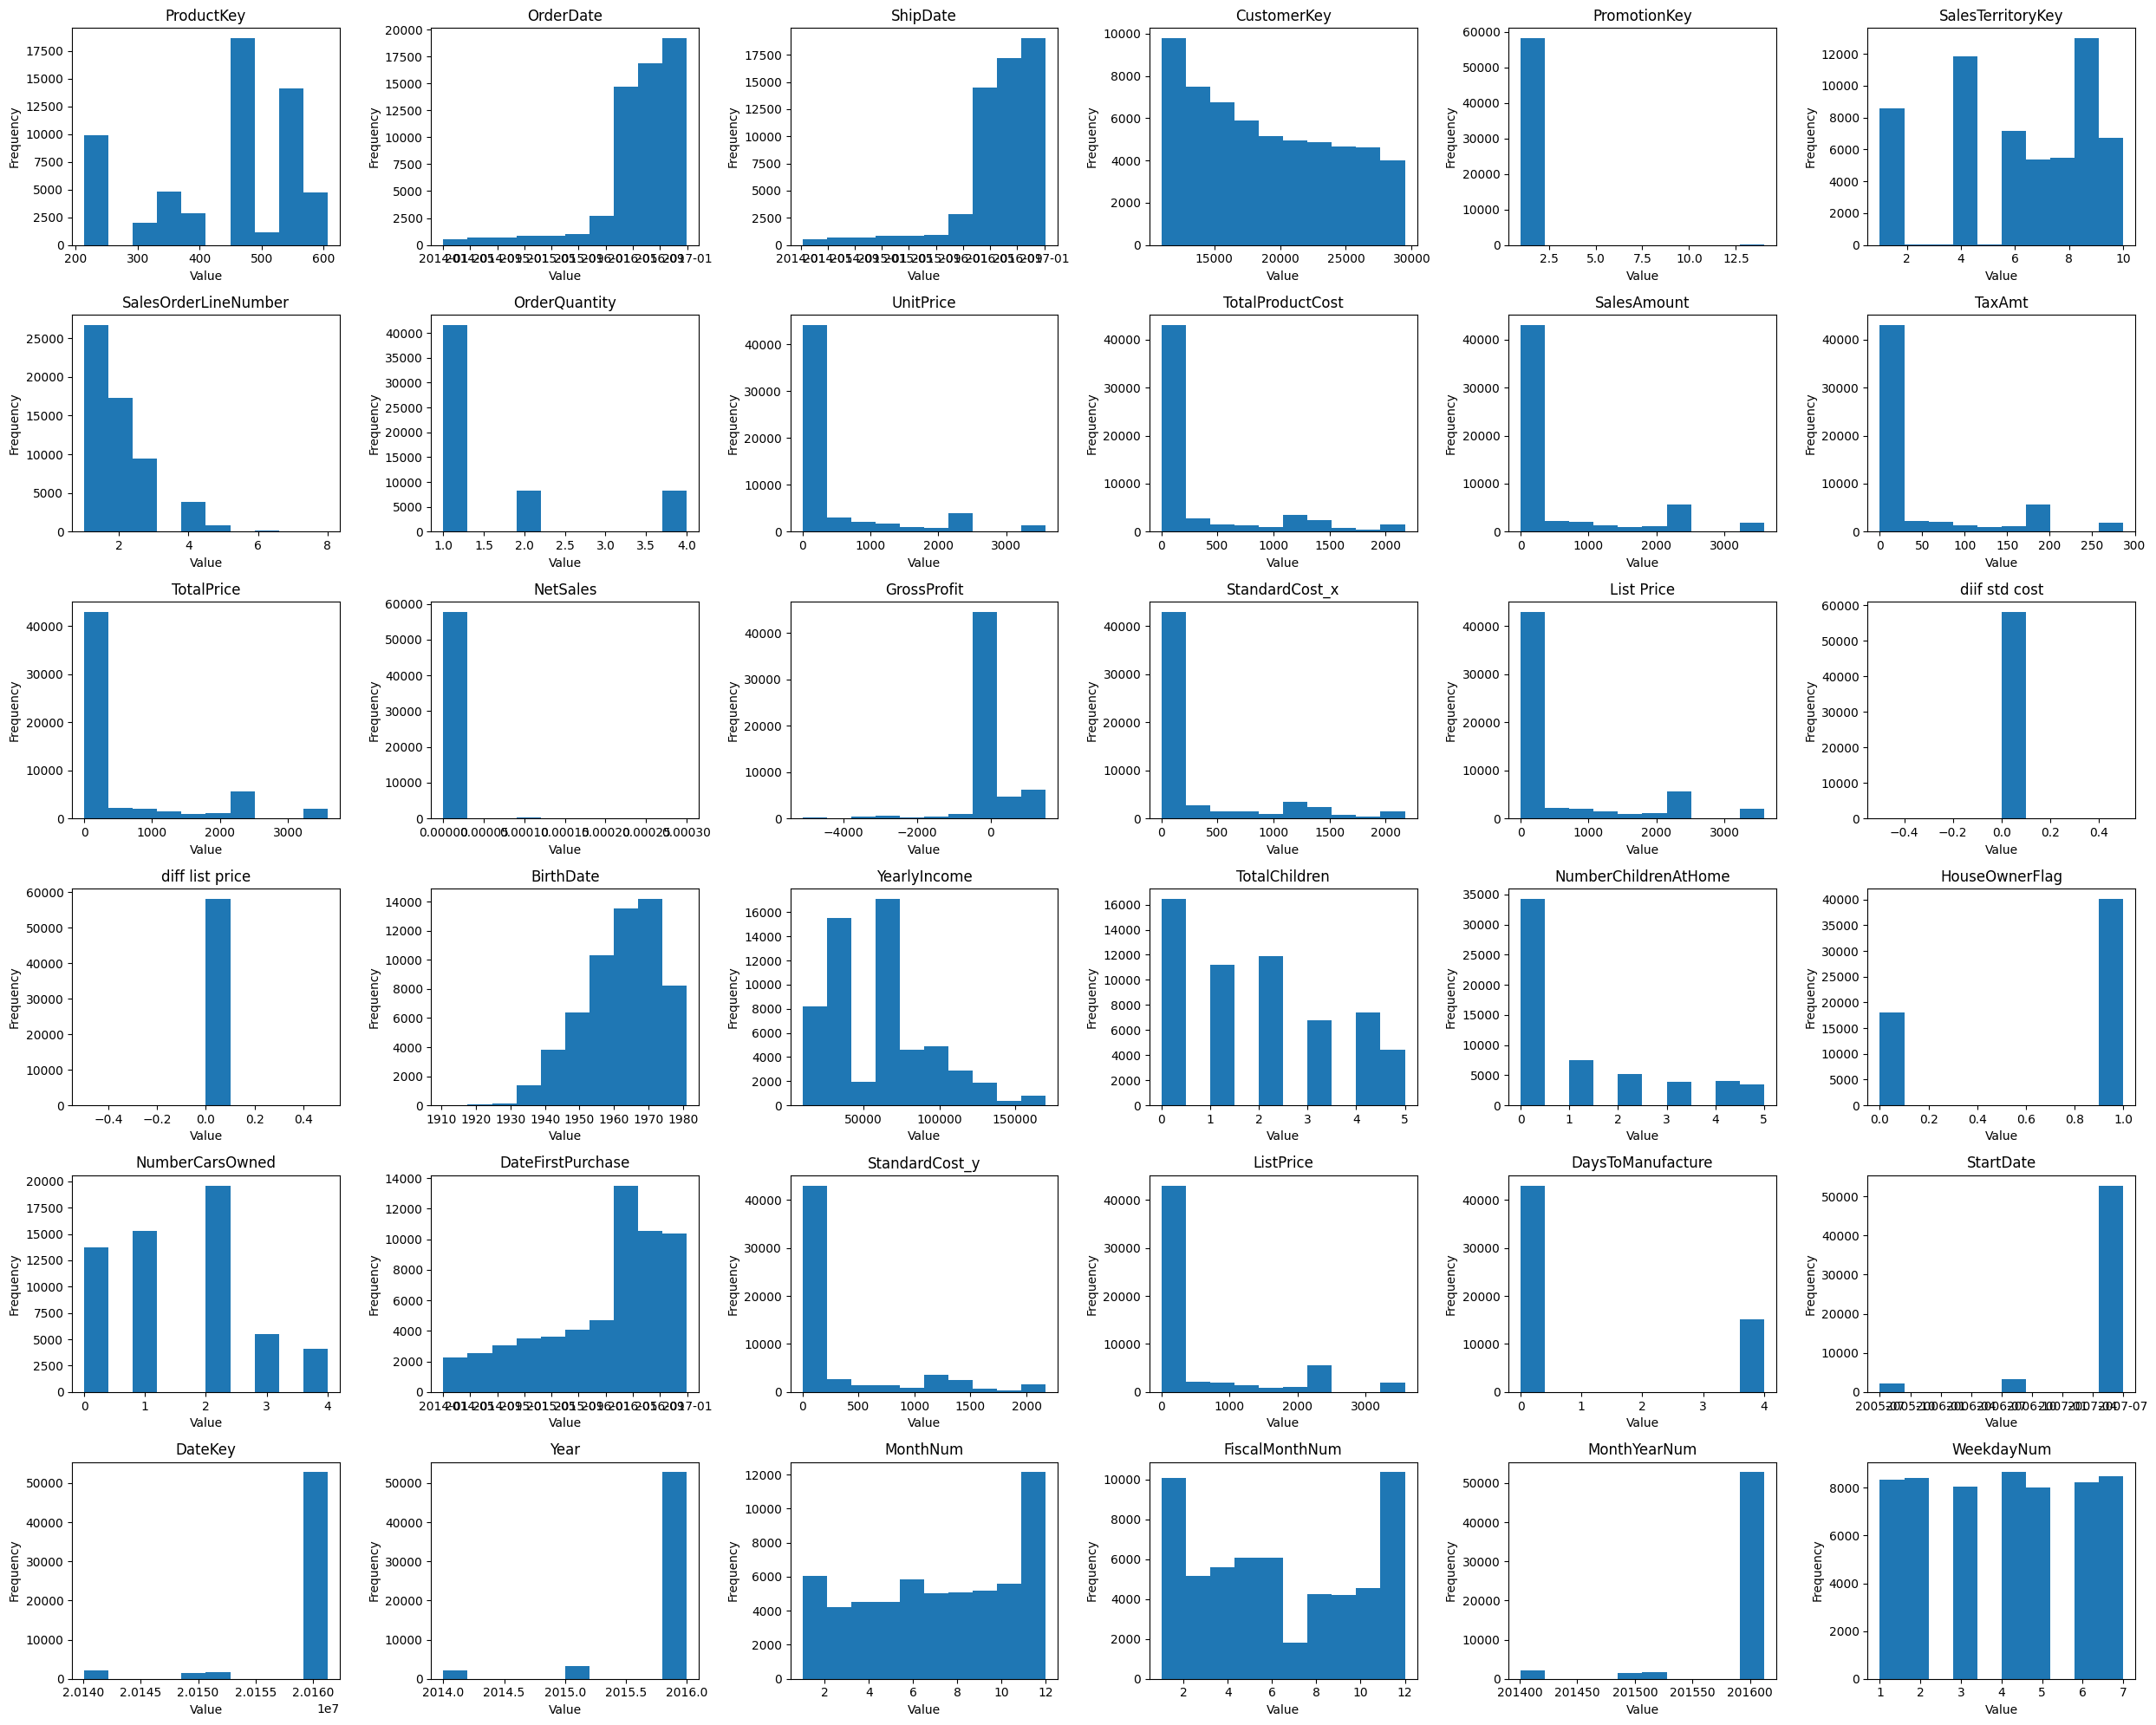

In [ ]:
axes = final_df.hist(figsize=(25, 20))
for ax in axes.flatten():
    ax.grid(False)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

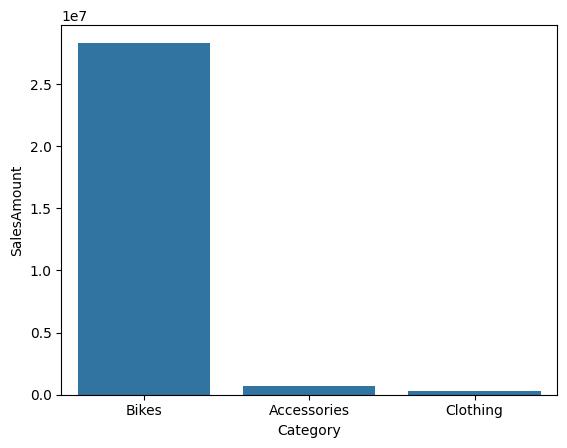

In [ ]:
sns.barplot(data=final_df, x="Category", y="SalesAmount", estimator=sum, errorbar=None)
plt.show()

In [ ]:
sales_quantity = final_df.groupby('ProductName')['OrderQuantity'].sum().reset_index()
top_10_products_quantity = sales_quantity.sort_values(by='OrderQuantity', ascending=False).head(10)
print(top_10_products_quantity)

                 ProductName  OrderQuantity
126    Water Bottle - 30 oz.           6370
52       Patch Kit/8 Patches           4705
23        Mountain Tire Tube           4551
56            Road Tire Tube           3544
101    Sport-100 Helmet, Red           3398
6      Fender Set - Mountain           3239
100   Sport-100 Helmet, Blue           3193
0               AWC Logo Cap           3178
99   Sport-100 Helmet, Black           3094
22      Mountain Bottle Cage           2977


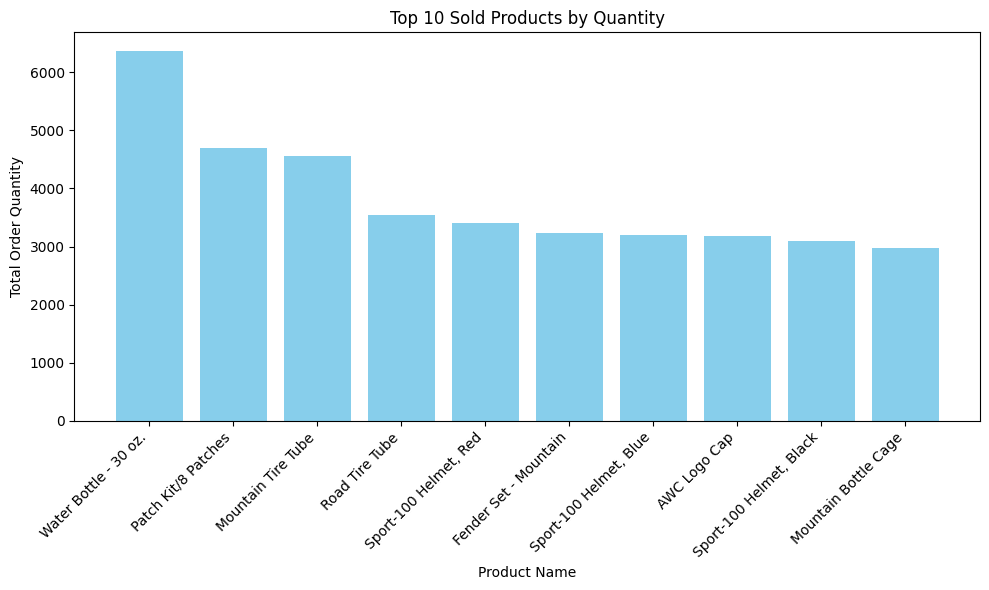

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_products_quantity['ProductName'], top_10_products_quantity['OrderQuantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.title('Top 10 Sold Products by Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
sales_amount = final_df.groupby('ProductName')['SalesAmount'].sum().reset_index()
top_10_products_amount = sales_amount.sort_values(by='SalesAmount', ascending=False).head(10)
print(top_10_products_amount)

                ProductName   SalesAmount
34   Mountain-200 Black, 46  1.373470e+06
33   Mountain-200 Black, 42  1.363142e+06
35  Mountain-200 Silver, 38  1.339463e+06
37  Mountain-200 Silver, 46  1.301100e+06
32   Mountain-200 Black, 38  1.294866e+06
36  Mountain-200 Silver, 42  1.257435e+06
58         Road-150 Red, 48  1.205877e+06
61         Road-150 Red, 62  1.202299e+06
59         Road-150 Red, 52  1.080638e+06
60         Road-150 Red, 56  1.055590e+06


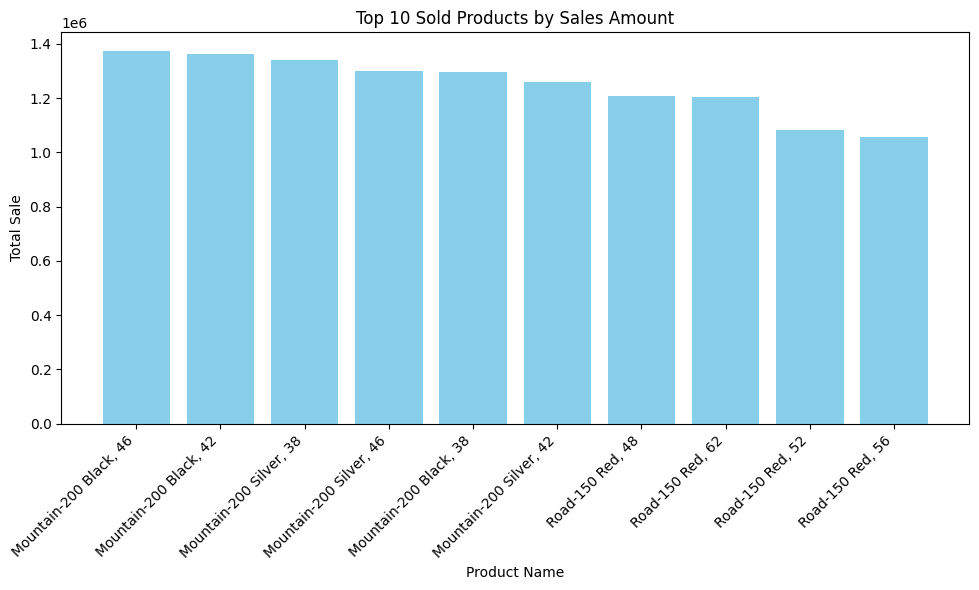

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_products_amount['ProductName'], top_10_products_amount['SalesAmount'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Sale')
plt.title('Top 10 Sold Products by Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

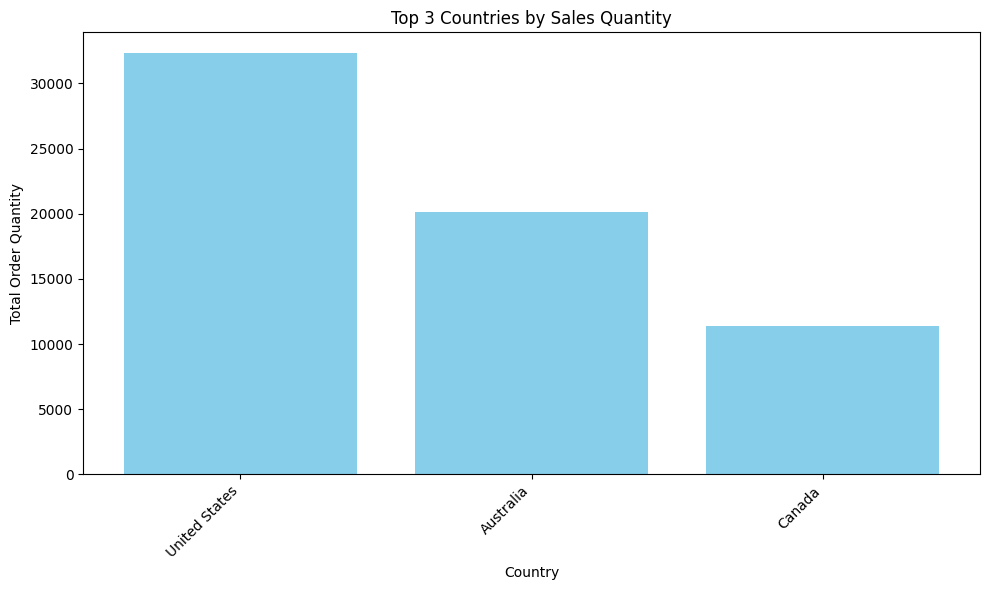

In [ ]:
sales_quantity_by_country = final_df.groupby('Country')['OrderQuantity'].sum().reset_index()
top_3_countries_quantity = sales_quantity_by_country.sort_values(by='OrderQuantity', ascending=False).head(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_countries_quantity['Country'], top_3_countries_quantity['OrderQuantity'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Order Quantity')
plt.title('Top 3 Countries by Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

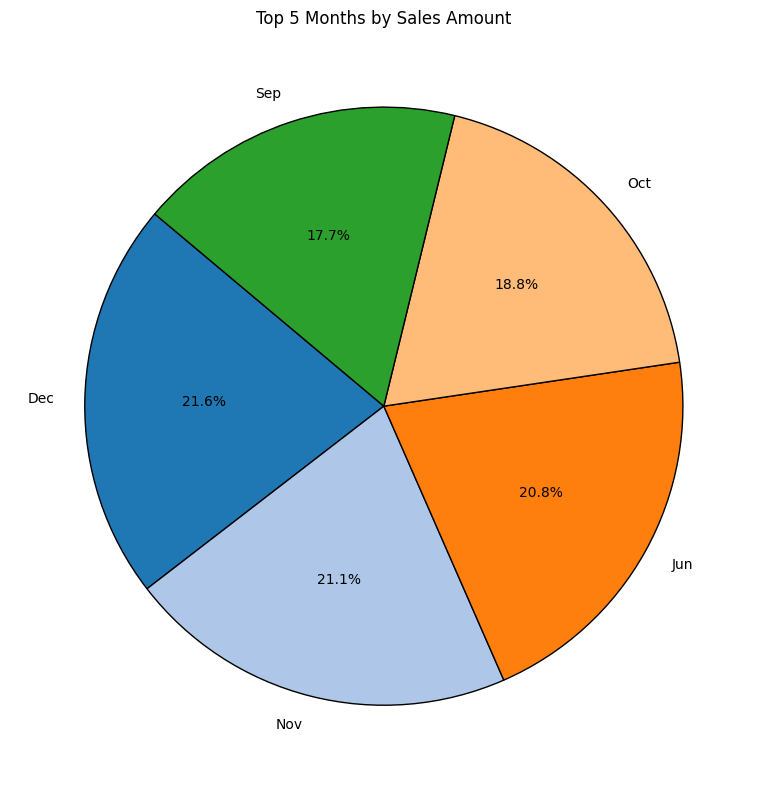

In [ ]:
sales_amount_by_month = final_df.groupby('Month')['SalesAmount'].sum().reset_index()
top_5_months_amount = sales_amount_by_month.sort_values(by='SalesAmount', ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_months_amount['SalesAmount'],
    labels=top_5_months_amount['Month'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('tab20').colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 5 Months by Sales Amount')
plt.tight_layout()
plt.show()

In [ ]:
budget_file = pd.ExcelFile('Budget.xlsx')
print(budget_file.sheet_names)
budget_sheet = budget_file.parse('Budget')

['Budget']


In [ ]:
print(budget_sheet.columns)

Index(['Category', 'Subcategory', 'ProductName', 'ProductKey', 'Jan, 2016',
       'Feb, 2016', 'Mar, 2016', 'Apr, 2016', 'May, 2016', 'Jun, 2016',
       'Jul, 2016', 'Aug, 2016', 'Sep, 2016', 'Oct, 2016', 'Nov, 2016',
       'Dec, 2016', 'Grand Total'],
      dtype='object')


In [ ]:
filtered_budget_sheet = budget_sheet[~budget_sheet['Category'].str.contains('SubTotal|Grand Total')]
print(filtered_budget_sheet)

       Category        Subcategory                 ProductName  ProductKey  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike       483.0   
1   Accessories        Bike Stands      All-Purpose Bike Stand       486.0   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.       477.0   
3   Accessories           Cleaners       Bike Wash - Dissolver       484.0   
4   Accessories            Fenders       Fender Set - Mountain       485.0   
5   Accessories            Helmets       Sport-100 Helmet, Red       212.0   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.       487.0   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches       480.0   
9         Bikes     Mountain Bikes     Mountain-100 Silver, 38       344.0   
10        Bikes         Road Bikes            Road-150 Red, 62       310.0   
11        Bikes      Touring Bikes       Touring-2000 Blue, 60       560.0   
13     Clothing               Caps                AWC Logo Cap  

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sales_summary = final_df.groupby('Category')['SalesAmount'].sum().reset_index()
budget_summary = filtered_budget_sheet.groupby('Category')['Grand Total'].sum().reset_index()
print(sales_summary)
print(budget_summary)

      Category  SalesAmount
0  Accessories    667015.32
1        Bikes  28318144.65
2     Clothing    322676.62
      Category  Grand Total
0  Accessories       687607
1        Bikes     15848226
2     Clothing       333741


In [ ]:
combined_sheet = pd.merge(sales_summary, budget_summary, on='Category')
combined_sheet.columns = ['Category', 'SalesAmount', 'BudgetAmount']
print(combined_sheet)

      Category  SalesAmount  BudgetAmount
0  Accessories    667015.32        687607
1        Bikes  28318144.65      15848226
2     Clothing    322676.62        333741


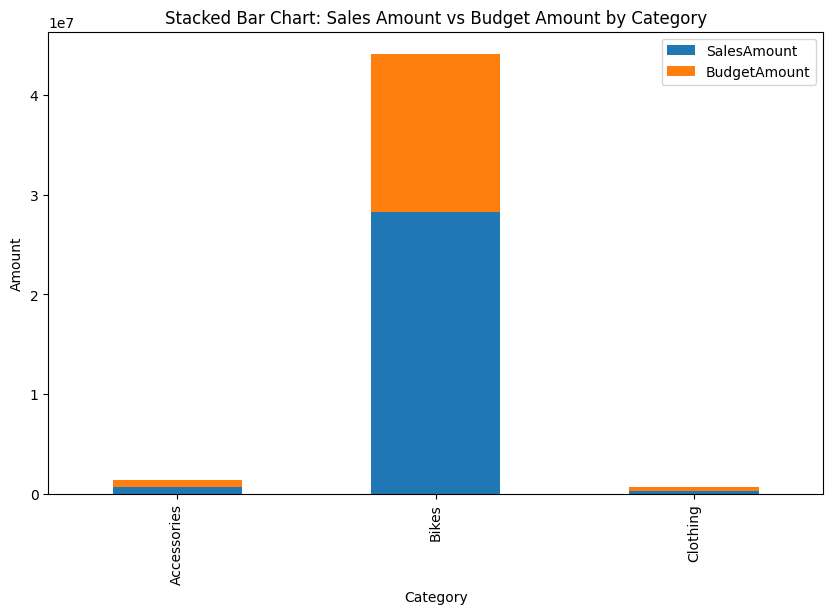

In [ ]:
combined_sheet.plot(x='Category',
                 y=['SalesAmount', 'BudgetAmount'],
                 kind='bar',
                 stacked=True,
                 figsize=(10, 6),
                 color=['#1f77b4', '#ff7f0e'])

plt.title('Stacked Bar Chart: Sales Amount vs Budget Amount by Category')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.show()

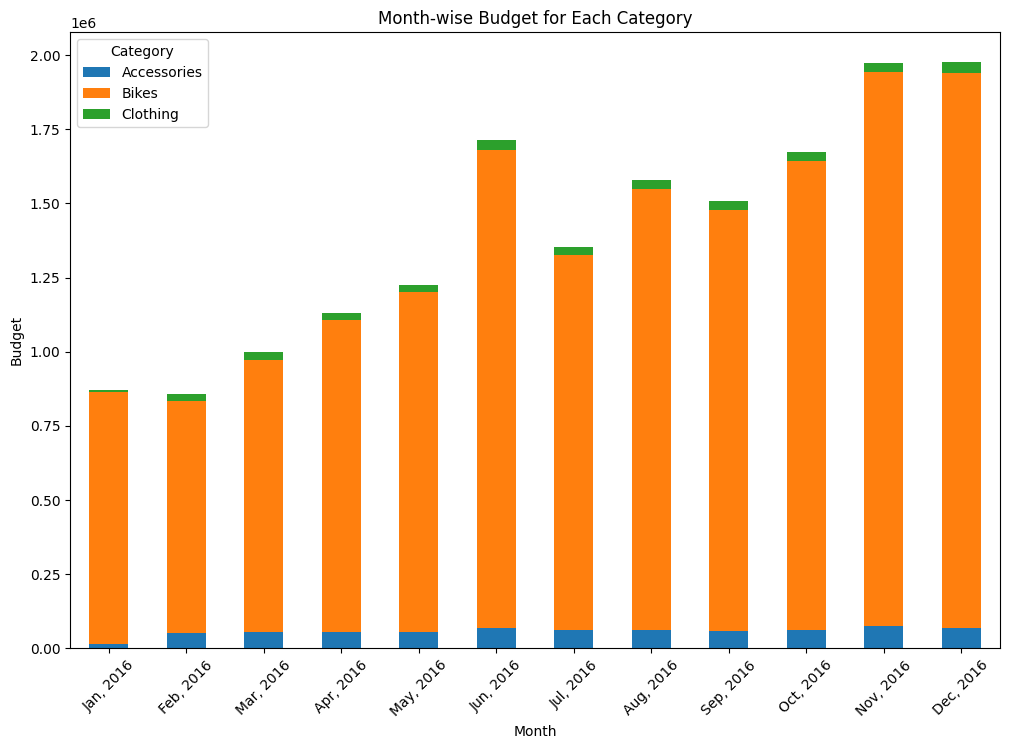

In [ ]:
filtered_budget_sheet = filtered_budget_sheet.drop(columns=['Subcategory', 'ProductName', 'ProductKey', 'Grand Total'])
df_grouped = filtered_budget_sheet.groupby('Category').sum()
ax = df_grouped.T.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_xlabel('Month')
ax.set_ylabel('Budget')
ax.set_title('Month-wise Budget for Each Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
target = final_df['SalesAmount']

categorical_features = ['PromotionKey', 'SalesTerritoryKey', 'MaritalStatus', 'Gender',
                        'Education', 'Occupation', 'HouseOwnerFlag', 'CommuteDistance',
                        'ProductName', 'SubCategory', 'Category', 'Color', 'ProductLine',
                        'ModelName', 'Month', 'FiscalMonth', 'Weekday', 'WeekdayWeekend',
                        'Region', 'Country', 'Group', 'Quarter', 'FiscalQuarter','FiscalYear']

numerical_features = ['OrderQuantity', 'UnitPrice', 'TotalProductCost', 'TaxAmt',
                      'TotalPrice', 'NetSales', 'GrossProfit', 'StandardCost_x',
                      'diff list price', 'YearlyIncome', 'TotalChildren',
                      'NumberChildrenAtHome', 'NumberCarsOwned', 'StandardCost_y',
                      'ListPrice', 'DaysToManufacture', 'Year', 'MonthNum',
                       'FiscalMonthNum', 'MonthYearNum', 'WeekdayNum']

In [ ]:
print(final_df.dtypes)

ProductKey                 int64
OrderDate         datetime64[ns]
ShipDate          datetime64[ns]
CustomerKey                int64
PromotionKey               int64
                       ...      
WeekdayWeekend            object
Region                    object
Country                   object
Group                     object
RegionImage               object
Length: 67, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X = final_df[categorical_features + numerical_features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_numerical = scaler.fit_transform(X_test[numerical_features])

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.fit_transform(X_test[categorical_features])

X_train_processed = np.hstack([X_train_numerical,X_train_categorical])
X_test_processed = np.hstack([X_test_numerical,X_test_categorical])

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed,y_train)

y_pred = model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Root Mean Squared Error (RMSE): 6.05
Mean Absolute Error (MAE): 4.08
R-squared (R²): 1.00


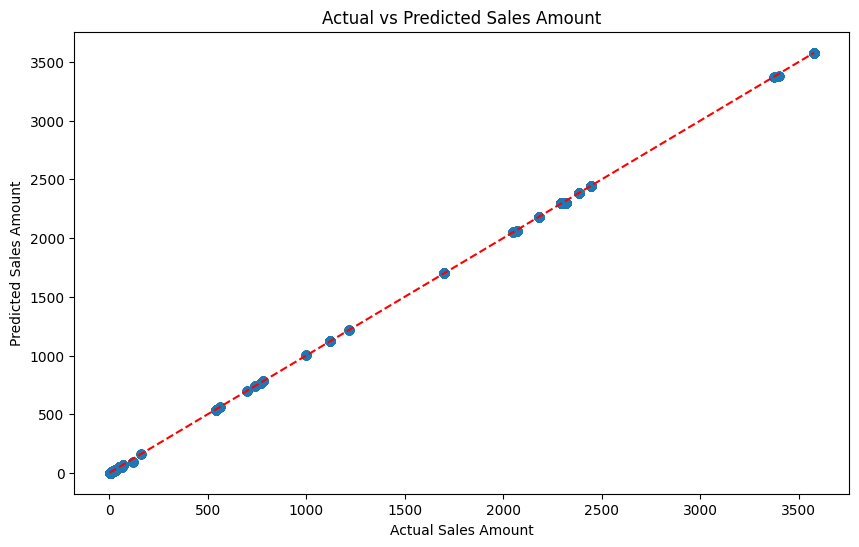

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()